In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

impianti = pd.read_csv('impianti.csv', delimiter = ';', decimal=".")

'''
Memorizzate in una variabile selezione gli impianti installati dopo l'anno 2000 e prima del 2019
'''
impianti
a = impianti[impianti['GENERATORE_DATA_INST'] > 2000]
selezione = a[a['GENERATORE_DATA_INST'] < 2019]
selezione

,Unnamed: 0.1,Unnamed: 0,IDENTIFICATIVO_IMPIANTO,GENERATORI_NUMERO,EDIFICIO_CATEGORIA,GENERATORE_POTENZA,GENERATORE_COMBUSTIBILE,GENERATORE_DATA_INST,RAPPORTO_DI_CONTROLLO_DATA,RAP_DI_CONTROLLO_ESITO,ISPEZIONE_DATA,ISPEZIONE_ESITO
1,14,14,2eedc9b812095cad7f849fe228ec7ff89,1.0,E1,24.0,GAS NATURALE,2011,2018,Positivo,2007,Positivo
2,36,36,2f3d39bfc2094cbd5f34ffb2188c3ff89,1.0,E1,28.1,GAS NATURALE,2008,2018,Positivo,2015,Negativo
4,70,70,2f2d49f8d2995cad3f940f6258dc2ff89,1.0,E1,40.0,GASOLIO,2012,2017,Positivo,2016,Positivo
5,71,71,286ad9b9f5d95c5ddf34afb258fc3ff89,1.0,E1,62.0,GAS NATURALE,2006,2019,Positivo,2016,Positivo
6,74,74,2f4de969c3995c5d6f940fc288fc4ff89,1.0,E1,23.3,GAS NATURALE,2006,2018,Positivo,2008,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...
365770,3297930,3297930,2f4c297843b93c6dcfb4aff278cc1ff89,1.0,E1,23.0,GAS NATURALE,2004,2017,Positivo,2013,Positivo
365771,3297931,3297931,2f4cf9b982e95cbd1ff4af9258ac4ff89,1.0,E1,27.9,GAS NATURALE,2008,2017,Positivo,2016,Positivo
365772,3297933,3297933,2f8ca9cf12796c2d7fa4ff8218cc0ff89,1.0,E1,27.9,GAS NATURALE,2004,2017,Positivo,2016,Positivo
365773,3297939,3297939,2efd29e802995c6ddf349f62789c7ff89,1.0,E1,26.0,GAS NATURALE,2014,2018,Positivo,2009,Positivo


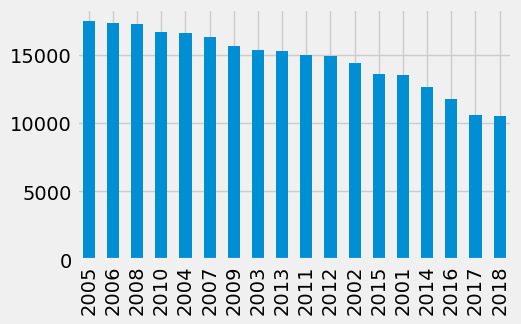

In [5]:
'''
4.1 Tracciate un grafico di GENERATORE_DATA_INST che convinca che, a partire dal 2001 e fino al 2018, ogni anno 
è stato installato circa lo stesso numero di impianti
'''

sel1 = selezione[selezione['GENERATORE_DATA_INST'] >= 2001]
sel2 = sel1[sel1['GENERATORE_DATA_INST'] <= 2018]
sel2['GENERATORE_DATA_INST'].value_counts().plot.bar()
plt.show()

In [6]:
#4.2 Quanto vale in questa selezione l'eterogeneità di GENERATORE_DATA_INST ?
print('eterogeneità pari al numero di anni presi in considerazione, ossia 18')

eterogeneità pari al numero di anni presi in considerazione, ossia 18


In [8]:
#4.3 Calcolate la tabella delle frequenze relative di ISPEZIONE_ESITO
selezione_freq = pd.crosstab(index = selezione['ISPEZIONE_ESITO'], columns = ['Frequenza relativa'], colnames = [''])
selezione_rel_freq = selezione_freq / selezione_freq.sum()
selezione_rel_freq

,Frequenza relativa
ISPEZIONE_ESITO,
Negativo,0.236387
Positivo,0.763613


In [9]:
#4.5 Percentuale impianti ispezionati che ha avuto ispezione con esito positivo 
(len(selezione[selezione['ISPEZIONE_ESITO'] == 'Positivo'])/len(selezione))*100

76.3613385143547

In [12]:
'''
4.6 L'impianto termico del mio condominio è stato ispezionato qualche anno fa, ricordo che era un anno successivo al 2000. 
Non è ancora stato ispezionato. Fornire una stima della probabilità p che, quando verrà ispezionato, l'impianto ottenga 
esito positivo
'''

m1 = selezione[selezione['GENERATORE_DATA_INST'] > 2000]
p = len(m1[m1['ISPEZIONE_ESITO'] == 'Positivo'])/len(selezione)
p

0.763613385143547

In [13]:
#4.7 Taglia del campione usato al punto precedente
len(m1[m1['ISPEZIONE_ESITO'] == 'Positivo'])

202411

In [14]:
#4.8 Quale stimatore avete usato per stimare p ? 
print('La media campionaria')

La media campionaria


In [ ]:
'''
4.9 Fornire una condizione sufficiente per la taglia n del campione affinchè non sia inferiore a 0.95 la probabilità 
P(|Tn-p| <= 0.01)
'''
